<a href="https://colab.research.google.com/github/cdsrijon/AI-ML-Projects/blob/main/Regression_Models_on_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Dataset

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data'
df = pd.read_csv(url, delim_whitespace=True, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

df.head()

/tmp/ipython-input-3963843019.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#Split Data

In [3]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (404, 13)
Shape of X_test: (102, 13)
Shape of y_train: (404,)
Shape of y_test: (102,)


#Model Training

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize the models
linear_reg_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Fit the models on the training data
linear_reg_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

print("Models trained successfully!")

Models trained successfully!


#Evaluation Metrices

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression Metrics:")
print(f"  MSE: {mse_linear:.2f}")
print(f"  RMSE: {rmse_linear:.2f}")
print(f"  R² Score: {r2_linear:.2f}")
print(f"  MAE: {mae_linear:.2f}")
print("-" * 20)

# Calculate metrics for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print(f"  MSE: {mse_ridge:.2f}")
print(f"  RMSE: {rmse_ridge:.2f}")
print(f"  R² Score: {r2_ridge:.2f}")
print(f"  MAE: {mae_ridge:.2f}")
print("-" * 20)

# Calculate metrics for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression Metrics:")
print(f"  MSE: {mse_lasso:.2f}")
print(f"  RMSE: {rmse_lasso:.2f}")
print(f"  R² Score: {r2_lasso:.2f}")
print(f"  MAE: {mae_lasso:.2f}")

Linear Regression Metrics:
  MSE: 24.29
  RMSE: 4.93
  R² Score: 0.67
  MAE: 3.19
--------------------
Ridge Regression Metrics:
  MSE: 24.48
  RMSE: 4.95
  R² Score: 0.67
  MAE: 3.13
--------------------
Lasso Regression Metrics:
  MSE: 24.41
  RMSE: 4.94
  R² Score: 0.67
  MAE: 3.25


# Create scatter plots for each model

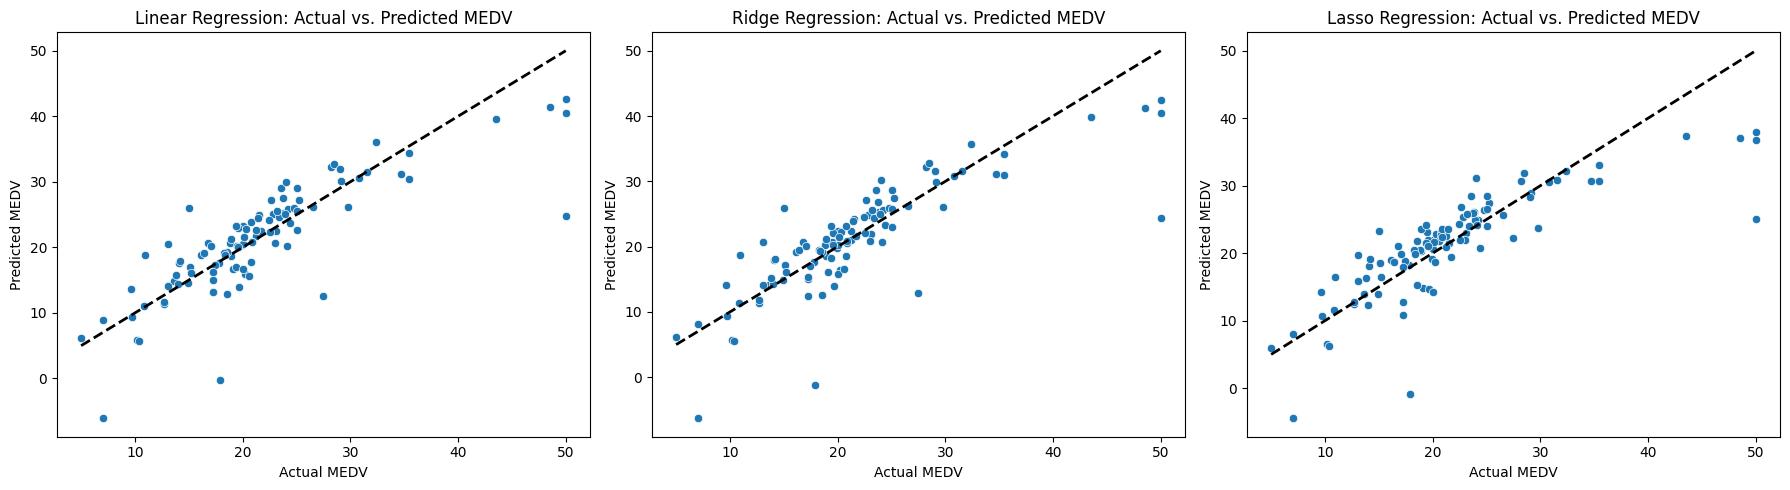

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for each model
plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression: Actual vs. Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line

# Ridge Regression
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Ridge Regression: Actual vs. Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line

# Lasso Regression
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_lasso)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Lasso Regression: Actual vs. Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line

plt.tight_layout()
plt.show()

#Residual Plot

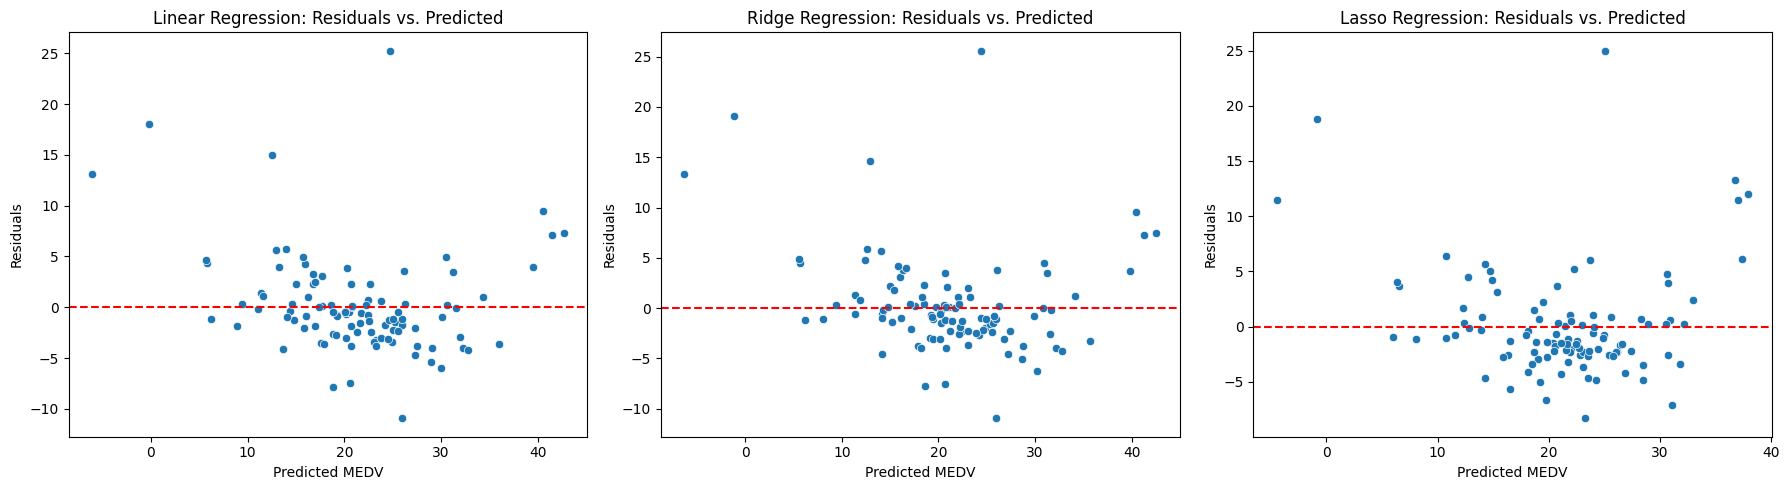

In [7]:
# Calculate residuals
residuals_linear = y_test - y_pred_linear
residuals_ridge = y_test - y_pred_ridge
residuals_lasso = y_test - y_pred_lasso

plt.figure(figsize=(18, 5))

# Linear Regression Residual Plot
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_pred_linear, y=residuals_linear)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals vs. Predicted")

# Ridge Regression Residual Plot
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Ridge Regression: Residuals vs. Predicted")

# Lasso Regression Residual Plot
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Lasso Regression: Residuals vs. Predicted")

plt.tight_layout()
plt.show()